In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [358]:
cccf=pd.read_csv("/content/final_cccf.csv")
df=cccf.copy()

In [357]:
df.isnull()


,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,False,False,False,False
...,...,...,...,...,...
11270,False,False,False,True,True
11271,False,False,False,True,True
11272,False,False,False,True,True
11273,False,False,False,True,True


In [360]:
df["cc_rating"].info()
df["cf_rating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11275 entries, 0 to 11274
Series name: cc_rating
Non-Null Count  Dtype  
--------------  -----  
10280 non-null  float64
dtypes: float64(1)
memory usage: 88.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 11275 entries, 0 to 11274
Series name: cf_rating
Non-Null Count  Dtype  
--------------  -----  
7437 non-null   float64
dtypes: float64(1)
memory usage: 88.2 KB


3838

In [364]:
f= (pd.notna(df["cf_rating"]) & pd.notna(df["cc_username"]))
final =df[f]
FINAL=final.copy()

In [366]:
FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 0 to 10278
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  6442 non-null   object 
 1   cf_username  6442 non-null   object 
 2   cf_rating    6442 non-null   float64
 3   cc_username  6442 non-null   object 
 4   cc_rating    6442 non-null   float64
dtypes: float64(2), object(3)
memory usage: 302.0+ KB


In [367]:
cc_mean=FINAL["cc_rating"].mean()
cc_std=FINAL["cc_rating"].std()
cf_mean=FINAL["cf_rating"].mean()
cf_std=FINAL["cf_rating"].std()


FINAL["cc_rating"]= (FINAL["cc_rating"]-cc_mean)/cc_std
FINAL["cf_rating"]= (FINAL["cf_rating"]-cf_mean)/cf_std

In [368]:
shuffle = FINAL.sample(frac=1, random_state=42).reset_index(drop=True)

In [369]:
y_t=shuffle['cf_rating']
x_t=shuffle['cc_rating']

Text(0, 0.5, 'CF')

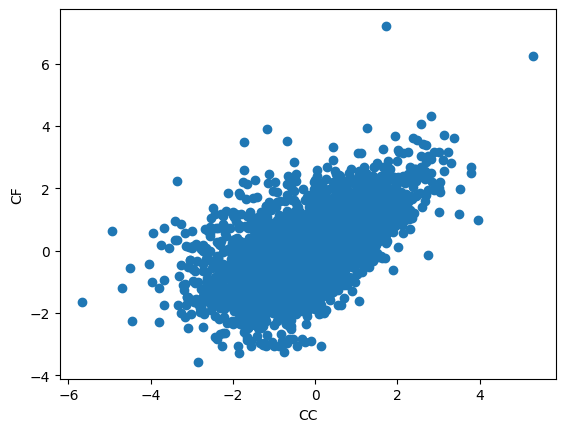

In [343]:
plt.scatter(x_t,y_t)
plt.xlabel("CC")
plt.ylabel("CF")

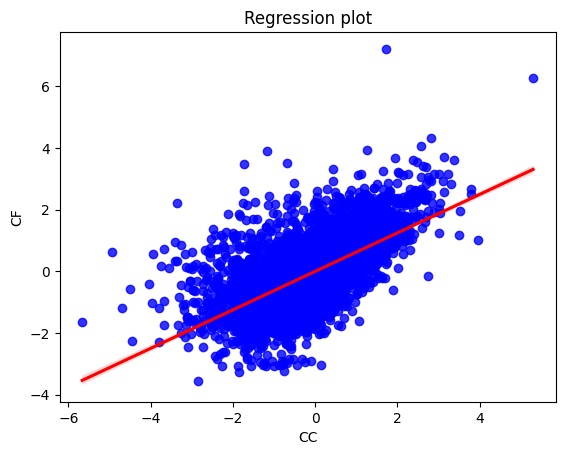

In [370]:
sns.regplot(x=x_t,y=y_t,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression plot')
plt.xlabel("CC")
plt.ylabel("CF")
plt.show()

In [371]:
def estimate_coef(x, y):

    n = np.size(x)

    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    M = SS_xy / SS_xx
    B = m_y - M*m_x

    return (B, M)

B,M = estimate_coef(x, y)
print("Y_Intercept is {B}",B,"\n","Slope is {M}",M)

Y_Intercept is {B} 1.0298705017160635e-16 
 Slope is {M} 0.6245876122997068


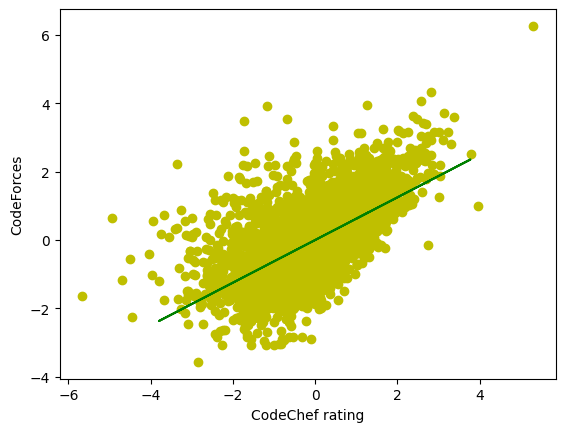

In [376]:
B = 1.0298705017160635e-16
M = 0.6245876122997068
# predicting it for 500 to test
def pred(codechef_rating):
    codeforces_rating=(codechef_rating*M)+B
    return codeforces_rating

print("Codechef to codeforces",pred(500))

def pred2(codeforces_rating):
  codechef_rating = (codeforces_rating - B)/M
  return codechef_rating
print("Codeforces to codechef",pred(500))

800.5282047766202